<a href="https://colab.research.google.com/github/Dave-314/Sentiment-Analysis/blob/main/NLP_Portfolio_Multinomail_NB_and_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=a04282686424a595d0e56cecd911be3c184fdeb2c29dfe59a4535e548a6a2c46
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji


# 📝 Natural Language Processing (NLP)
Natural Language Processing (NLP) is an enchanting field that empowers computers to understand, interpret, and generate human language. It enables computers to extract insights from text data, break it down into its components, and comprehend its meaning. NLP involves tasks like part-of-speech tagging, named entity recognition, sentiment analysis, and more. It utilizes statistical models, machine learning, and linguistic rules to perform its magic. NLP has diverse applications such as customer support, social media analysis, language translation, and chatbots. It is a captivating journey into the realm of unstructured text, where computers become linguistic superheroes and transform the way we interact with them.

The dataset for this journey has 50,000 movie reviews and are are evenly split between positive and negative reviews. The 2 variables in this dataset are the review of the movie and a labels sentiment which is either 'positive' or 'negative'.

This dataset can be downloaded from the link provided below:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
# if you running the code in this notebook, run this cell first to fix an error with
# HuggingFace accelerate package, the notebook may need to restart and reconnect
!pip install --upgrade accelerate
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 4.7 MB/s eta 0:00:00
Found existing installation: accelerate 0.20.3
Uninstalling accelerate-0.20.3:
  Successfully uninstalled accelerate-0.20.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.5 MB/s eta 0:00:00
  Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset from computer
data = files.upload()
# find origin of dataset and upload from a link so other users can run.
# i believe the dataset is too large for github, unless I cut the dataset into multiple smaller ones and combine them back together

Saving imdb_reviews.csv to imdb_reviews.csv


In [3]:
# import data set
# source for importing and IO code: https://www.youtube.com/watch?v=lmRo2z9N5jI  Author: Brian Sullivan
imdb = pd.read_csv(io.StringIO(data['imdb_reviews.csv'].decode('utf-8')))
print(imdb.head())
# print counts of each review
print('\n', imdb['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

 positive    25000
negative    25000
Name: sentiment, dtype: int64


## 🧹 Data cleaning
Now, let's dive into the data cleaning process. On the second line, there's a pesky '< b r />' element that needs to be removed. We'll swiftly take care of it, ensuring a smooth data flow. Additionally, we'll convert the sentiments into numerical values. 'Positive' will be represented as '1,' while 'negative' will be denoted as '0.' This conversion will help us streamline the data analysis and make it easier to interpret the results. So, let's get down to business and tidy up our dataset efficiently.

In [4]:
# remove <br '/> from review string
imdb['review'] = [x.replace('<br />', '') for x in imdb['review']]
# replace positive with 1 and negative with 0 and change sentiment to integer type
imdb['sentiment'] =  [int(x.replace('positive', '1')) if x == 'positive' else int(x.replace('negative', '0')) for x in imdb['sentiment']]
imdb = imdb[['review', 'sentiment']]
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Now, let's take a look at an example of a positive review and a negative review. It will provide a balanced perspective and help us understand the varying sentiments expressed by different individuals.

In [ ]:
print('Positive Review:', '\n', imdb['review'][1], '\n'*2,
      'Negative Review:', '\n', imdb['review'][3])

Positive Review: 
 A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done. 

 Negative Review


# Multinomial Naive Bayes
The first NLP model will be Multinomial Naive Bayes which is a popular classification algorithm that is commonly used in natural language processing tasks. It is based on the principles of Bayes' theorem and assumes that the features are conditionally independent given the class.

The algorithm calculates the probability of a document belonging to each class based on the occurrence of different words or features within the document. It then assigns the document to the class with the highest probability. This is achieved by estimating the probabilities using the training data, where the occurrence frequencies of features in each class are taken into account.

In [8]:
# import necessary packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, \
                            confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
def metrics_function(X_test, y_test, model):
  y_pred = model.predict(X_test)
  ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
  print(f'ROC-AUC Score: {round(ROC_AUC, 4)}', '\n',
      classification_report(y_test, y_pred,
                            target_names=['positive', 'negative']))

  matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(matrix)
  display.plot()
  plt.show()

In [ ]:
# separate dataframe into X and y
X = imdb['review']
y = imdb['sentiment']

# separate into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create Count Vectorizer
# can use argument max_features to save compute time
vectorizer = CountVectorizer(strip_accents='ascii',
                             stop_words='english',
                             lowercase=False,
                             ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow =  vectorizer.transform(X_test)

nb_clf = MultinomialNB()
nb_clf.fit(X_train_bow, y_train)

MultinomialNB()

ROC-AUC Score: 0.9457 
               precision    recall  f1-score   support

    positive       0.87      0.90      0.89      5044
    negative       0.90      0.86      0.88      4956

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



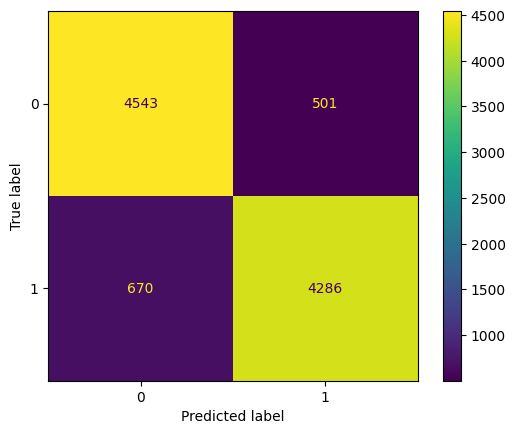

In [ ]:
metrics_function(X_test_bow, y_test, nb_clf)

##A brief introduction to a confusion matrix:
A confusion matrix is a helpful tool for evaluating prediction accuracy. It's like a grid that compares our predictions with the actual outcomes. It shows four scenarios: true positives (correct positive predictions), true negatives (correct negative predictions), false positives (incorrect positive predictions), and false negatives (incorrect negative predictions). By analyzing this matrix, we can understand how well our predictions align with reality, without needing complex technical knowledge.

## 📊 Multimomial Naive Bayes Results
The Naive Bayes model has achieved a commendable accuracy rate of 88%, showcasing its proficiency. Moreover, its recall (true negative rate) slightly surpasses its precision (true negative rate), indicating a slight advantage in accurately predicting negative reviews compared to positive ones. These findings shed light on the model's capabilities and highlight its ability to make informed predictions in the world of data analysis.

# Naive Bayes with TFIDF
Next, I will add a pipeline and a gridsearch to the model in an attempt to improve the model.

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used in natural language processing to measure the importance of a term in a document or a collection of documents. It combines term frequency (TF) and inverse document frequency (IDF) to assign weights to terms. TF captures the frequency of a term within a document, while IDF reflects the rarity of a term across the corpus. Multiplying TF and IDF yields a score that represents the relative importance of a term. TF-IDF is utilized in tasks such as information retrieval, document classification, and content analysis. It helps identify significant terms and facilitates accurate text analysis and retrieval.

In the quest for model optimization, we turn to the trusty GridSearch. This versatile tool helps us fine-tune the hyperparameters of our model, such as the ngram range, TFIDF vectorizer, and the alpha parameter in Naive Bayes. By systematically exploring different configurations, we can enhance the model's performance and uncover its true potential.

In [ ]:
# add a GridSearchCV and pipeline to the model
clf_pipe = Pipeline([
    ('vect', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=False)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB(alpha=1e-2))
])

parameters = {
    'vect__ngram_range':[(1,3), (1, 2), (2,2), (2, 3), (2, 4)],
    'tfidf__use_idf': [True, False],
    'nb__alpha': (1e-2, 1e-3)
}

# takes ~40 minutes to run, remove '#' if you want to run model
grid_pipe = GridSearchCV(clf_pipe, parameters, cv=5, n_jobs=-1)

grid_pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False,
                                                        stop_words='english',
                                                        strip_accents='ascii')),
                                       ('tfidf', TfidfTransformer()),
                                       ('nb', MultinomialNB(alpha=0.01))]),
             n_jobs=-1,
             param_grid={'nb__alpha': (0.01, 0.001),
                         'tfidf__use_idf': [True, False],
                         'vect__ngram_range': [(1, 3), (1, 2), (2, 2), (2, 3),
                                               (2, 4)]})

In [ ]:
print(f'Accuracy of the best gridsearch model was {grid_pipe.best_score_}', '\n',
      f'The best parameters from the gridsearch were: {grid_pipe.best_params_}')

Accuracy of the best gridsearch model was 0.8873000000000001 
 The best parameters from the gridsearch were: {'nb__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 3)}


ROC-AUC Score: 0.9585 
               precision    recall  f1-score   support

    positive       0.89      0.90      0.89      5044
    negative       0.90      0.88      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



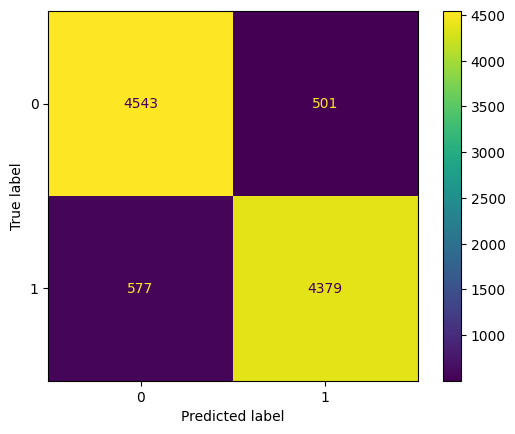

In [ ]:
metrics_function(X_test, y_test, grid_pipe)


## 📊 Hyper-parameter Tuning Results
Let's take a closer look at the Naive Bayes model and its hyper-parameter tuning, which yielded similar results to our initial 'basic' model. In a previous output, the gridsearch provided the 'best parameters', revealing that TFIDF did not significantly improve the model's score. While the tuned model slightly increased true positive predictions, it came at the cost of predicting fewer true negatives.

#🤗 Hugging Face distil-BERT Model
Moving on, we will explore the Hugging Face Transformers library—a widely used open-source platform for NLP. One of the models we will utilize is distil-BERT, a condensed version of the influential BERT model known for its proficiency in NLP tasks. Built on the transformer architecture, distil-BERT effectively captures contextual information and dependencies in text.

However, it's important to note that HF requires specific dataset formatting, necessitating additional data management steps before running the model. So, let's proceed with these necessary adjustments as we embark on our NLP journey.

In [5]:
# pip install packages
!pip install datasets
!pip install nltk
!pip install tqdm
!pip install evaluate

#import necesary packages
import html
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, get_scheduler
from datasets import Dataset, DatasetDict, load_dataset
from tqdm.notebook import tqdm
from tqdm.auto import tqdm
import evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-p

In [6]:
# the HF model requires the label variable to be named 'label'
imdb.rename(columns={'sentiment':'label'}, inplace=True)

imdb.head()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
# df is the original dataframe downloaded from the csv file
# convert dataframe into hugging face format
X = imdb['review']
y = imdb['label']

# *train_val represents the subset of data to be split into the train and validate set
# split data into train_val and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# split train_val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

# convert train, validation and test series into a pandas DataFrame for their respective X and y
# structure the X and y Series format into a dictionary format
# use pd.concat to convert the dictionary format into a dataframe

train_df = pd.concat(({'review': X_train, 'label': y_train}), axis=1)
train_df['index'] = train_df.reset_index().index
train_df.reset_index(inplace=True)
train_df.drop('level_0', inplace=True, axis=1)

validation_df = pd.concat(({'review': X_val, 'label': y_val}), axis=1)
validation_df['index'] = validation_df.reset_index().index
validation_df.reset_index(inplace=True)
validation_df.drop('level_0', inplace=True, axis=1)

test_df = pd.concat(({'review': X_test, 'label':y_test}), axis=1)
test_df['index'] = test_df.reset_index().index
test_df.reset_index(inplace=True)
test_df.drop('level_0', inplace=True, axis=1)
# create dataset dictionary format from the 3 dataframes
ds = DatasetDict()
ds['train'] = Dataset.from_pandas(train_df, split='train')
ds['validation'] = Dataset.from_pandas(validation_df, split='validation')
ds['test'] = Dataset.from_pandas(test_df, split='test')

In [10]:
# this model was designed for use with movie reviews
checkpoint = "lvwerra/distilbert-imdb"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, ignore_mismatched_sizes=True)

# create function to tokenize dataset
def tokenize_function(example):
  return tokenizer(example["review"], truncation=True, max_length=511, padding=True)

# apply tokenzer function to dataset and collate data
tokenized_ds = ds.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding=True)

Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [11]:
#pre-process the tokenized datasets to get them ready for the model

# remove uneccesary columns and rename 'label' column to 'labels'
tokenized_ds = tokenized_ds.remove_columns(['review', "index"])
tokenized_ds = tokenized_ds.rename_column("label", "labels")
# set dataset to run with pytorch
tokenized_ds.set_format("torch")

# ensure tensor appropriate columns are present for model
tokenized_ds["train"].column_names

['labels', 'input_ids', 'attention_mask']

In [12]:
#define the dataloaders

train_dataloader_ds = DataLoader(
    tokenized_ds["train"], shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader_ds = DataLoader(
    tokenized_ds["validation"], batch_size=8, collate_fn=data_collator
)

In [13]:
#check there is no mistake in pre-processing by running a test batch
for batch in train_dataloader_ds:
    break
{k: v.shape for k, v in batch.items()}

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 511]),
 'attention_mask': torch.Size([8, 511])}

In [14]:
# done with all the pre-processing steps, now run the model
# have to use ignore_mismatched_sizes=True because of error with tensors being different sizes
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2, ignore_mismatched_sizes=True)

In [15]:
# set the model to run on a gpu
device = torch.device('cuda')
model.to(device)
device

device(type='cuda')

In [16]:
#add an optimizer and a learning rate scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader_ds)
lr_scheduler = get_scheduler(
    'linear',
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)
print(num_training_steps)

12000


In [17]:
# add a progress bar to the model
progress_bar = tqdm(range(num_training_steps))

# add model to the GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
device

# train the model
error_count = 0
model.train()
for epoch in range(num_epochs):
  for batch in train_dataloader_ds:
    try:
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      loss = outputs.loss
      loss = outputs.loss

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.update(1)
    except RuntimeError:
      error_count += 1

  0%|          | 0/12000 [00:00<?, ?it/s]

In [ ]:
# print off the number of Runtime Errors (if any)
print(error_count)

0


In [18]:
num_eval_steps = int(len(eval_dataloader_ds))
progress_bar = tqdm(range(num_eval_steps))

metric = evaluate.load("glue", "mrpc")
model.eval()
for batch in eval_dataloader_ds:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])
    progress_bar.update(1)

metric.compute()

  0%|          | 0/1000 [00:00<?, ?it/s]

{'accuracy': 0.942, 'f1': 0.9414880201765446}


## 🤗 Hugging Face Results
The HF model got an accuracy and an f1 score of 94% which is 6% higher than the Naive Bayes model. The higher score came at a cost of taking about 50 minutes to run, even using a GPU. This would have taken many hours if ran on a CPU.

# Conclusion
The experiment compared multinomial Naive Bayes, multinomial Naive Bayes with TF-IDF, and the powerful Hugging Face Transformers distilBERT model. distilBERT emerged as the clear winner, outperforming the other methods. Its ability to capture contextual information and understand complex relationships within the text allowed it to generate highly accurate predictions, surpassing the traditional Naive Bayes models. In conclusion, distilBERT proved to be the superior choice for text classification and similar natural language processing tasks.